In [1]:
import pandas as pd
from itertools import permutations
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import jaccard_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import scipy.stats
from scipy.stats import mode
from scipy.spatial import ConvexHull
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

def dist_p(X, C):
  X = np.atleast_2d(X)
  C = np.atleast_2d(C)

  mat = np.zeros((X.shape[0], C.shape[0]))
  for i in range(X.shape[0]):
    for k in range(C.shape[0]):
      mat[i][k] = np.sqrt(np.dot((X[i,:] - C[k,:]),(X[i,:] - C[k,:]).T))
  return mat

def distp(X,C):
  return np.sqrt(((X - C) ** 2).sum())

def generate_centroids(X, k_clusters):
  rng = np.random.default_rng()
  C = rng.choice(X, k_clusters)
  return C

def populate_p_matrix(X, C, P):
  X = X.to_numpy()
  for index, row in enumerate(X):
    temp = []
    for centroid in C:
      temp.append(dist_p(row, centroid))

    P[index] = np.argmin(temp) + 1

def generate_new_centroids(X, P, k_clusters):
  new_P = pd.DataFrame(P.flatten(), columns=['cluster_number']) ### konwersja
  X = pd.concat([X, new_P], axis=1)
  C = X.groupby('cluster_number').mean()

  return C.to_numpy() ### konwersja

def k_means(X, k_clusters):
  P = np.empty((X.shape[0], 1))
  max_iters = 100
  iterations = 0

  #wybieramy losowe środki
  C = generate_centroids(X, k_clusters)
  old_C = np.zeros_like(C)
  old_P = np.zeros_like(P)
  #ew np warunek typu "Jeśli C różni się od old_C w więcej niż 10 wierszach to zatrzymaj"
  #and not (C == old_C).all() #sum(P[i] != old_P[i] for i in range(len(C))) > 4 # nie działa dobrze
  #operands could not be broadcast together with shapes (5,2) (7,2)  czasami crashuje?
  while iterations < max_iters and not (C == old_C).all(): #to jest okej warunek stopu, ale przydało by się coś lepszego
    #print('help')
    old_C = C
    #wyliczamy odległości i aktualizujemy macierz przynależności
    populate_p_matrix(X, C, P)
    #generujemy nowe środki
    C = generate_new_centroids(X, P, 3)
    iterations += 1
  return X, P, C, iterations

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[1.         0.75384615 0.68627451]
[1.      0.78125 0.72   ]


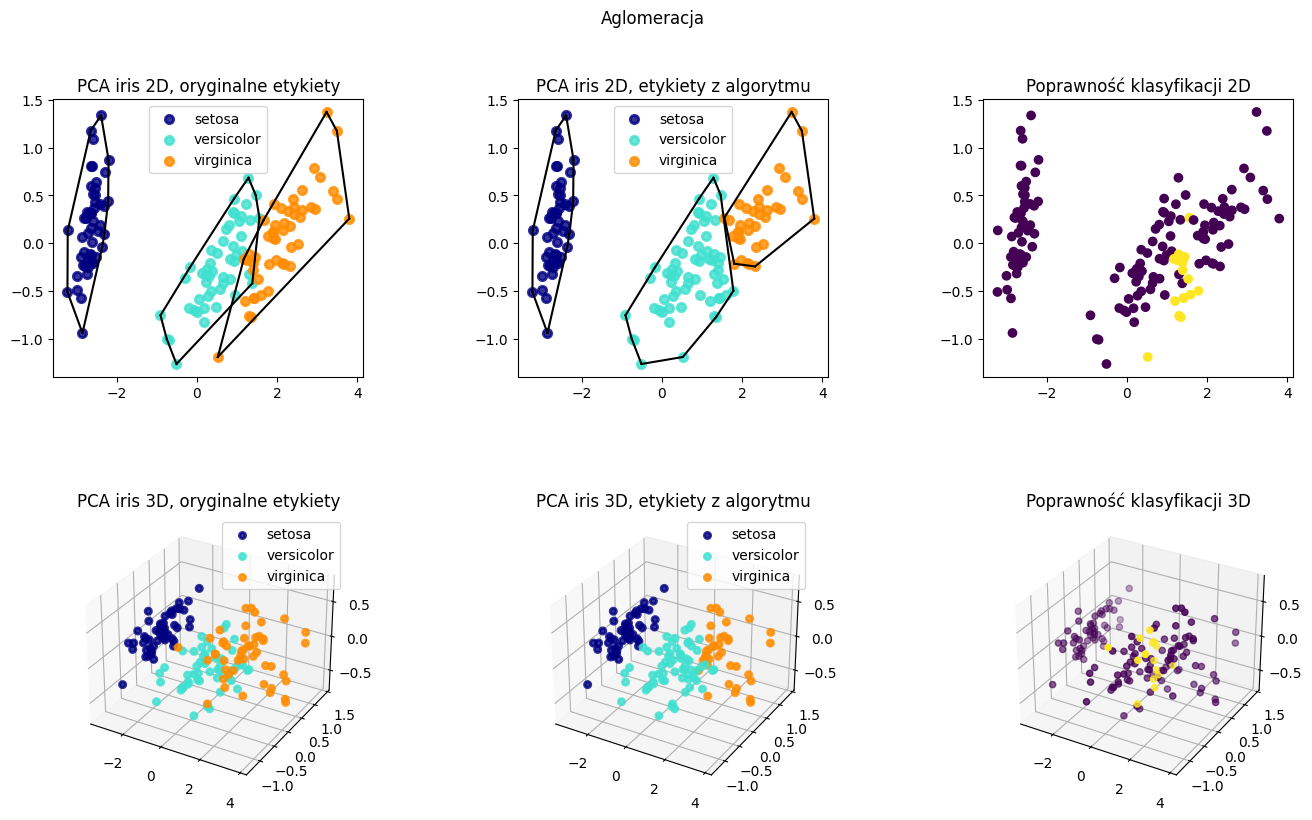

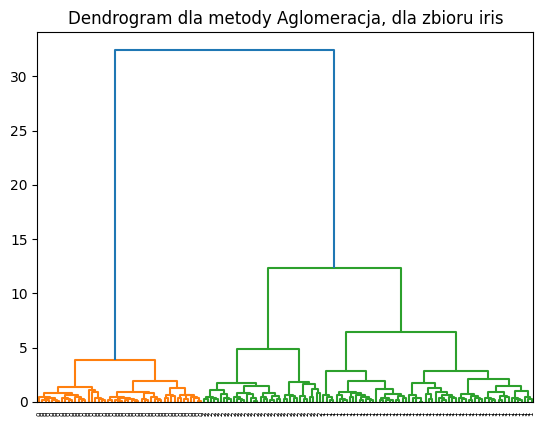

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


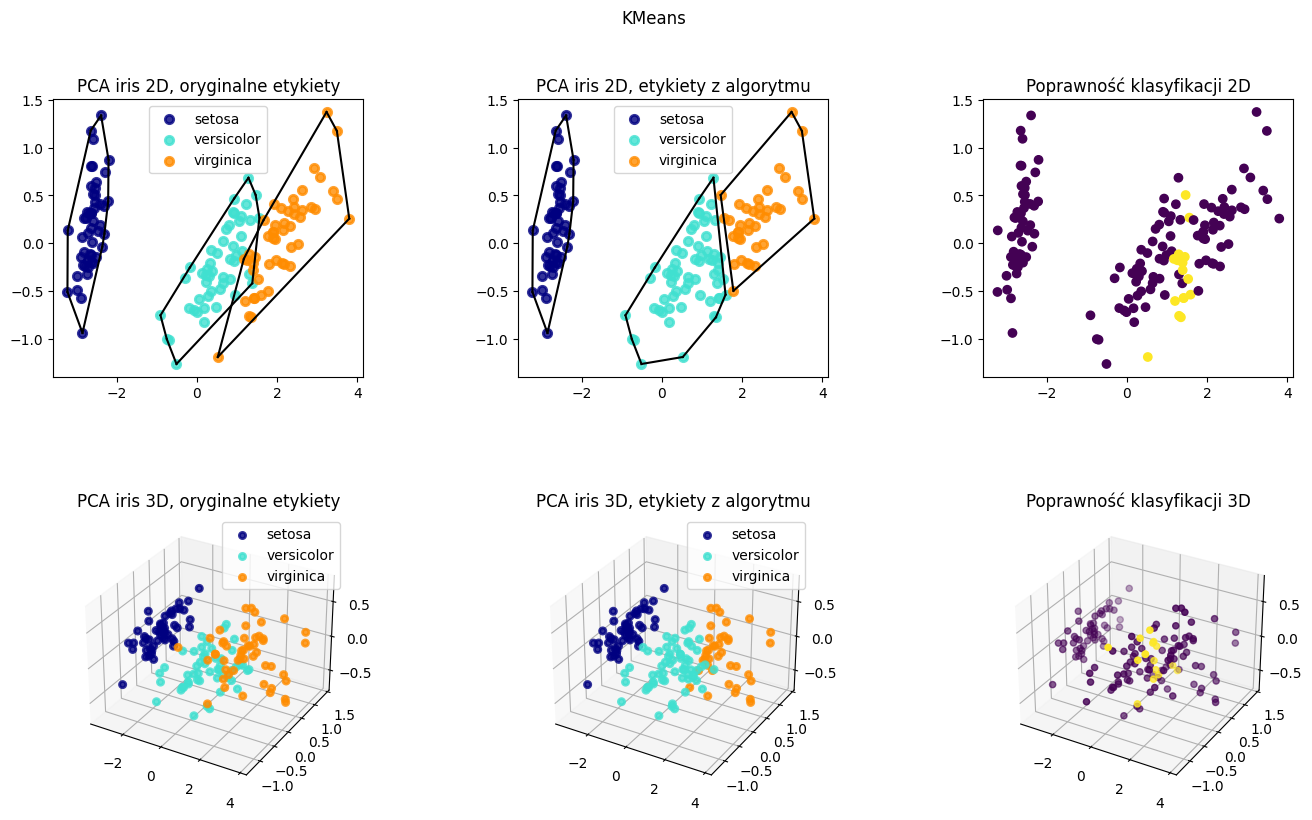

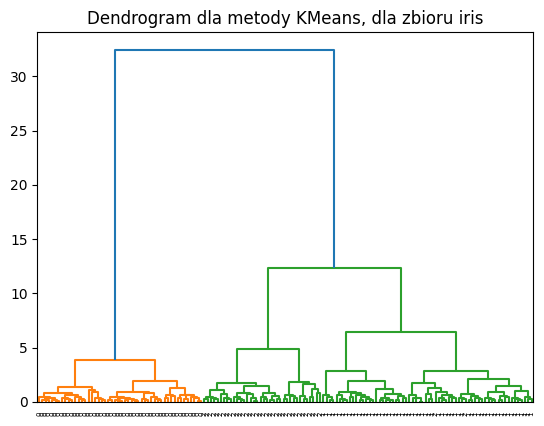

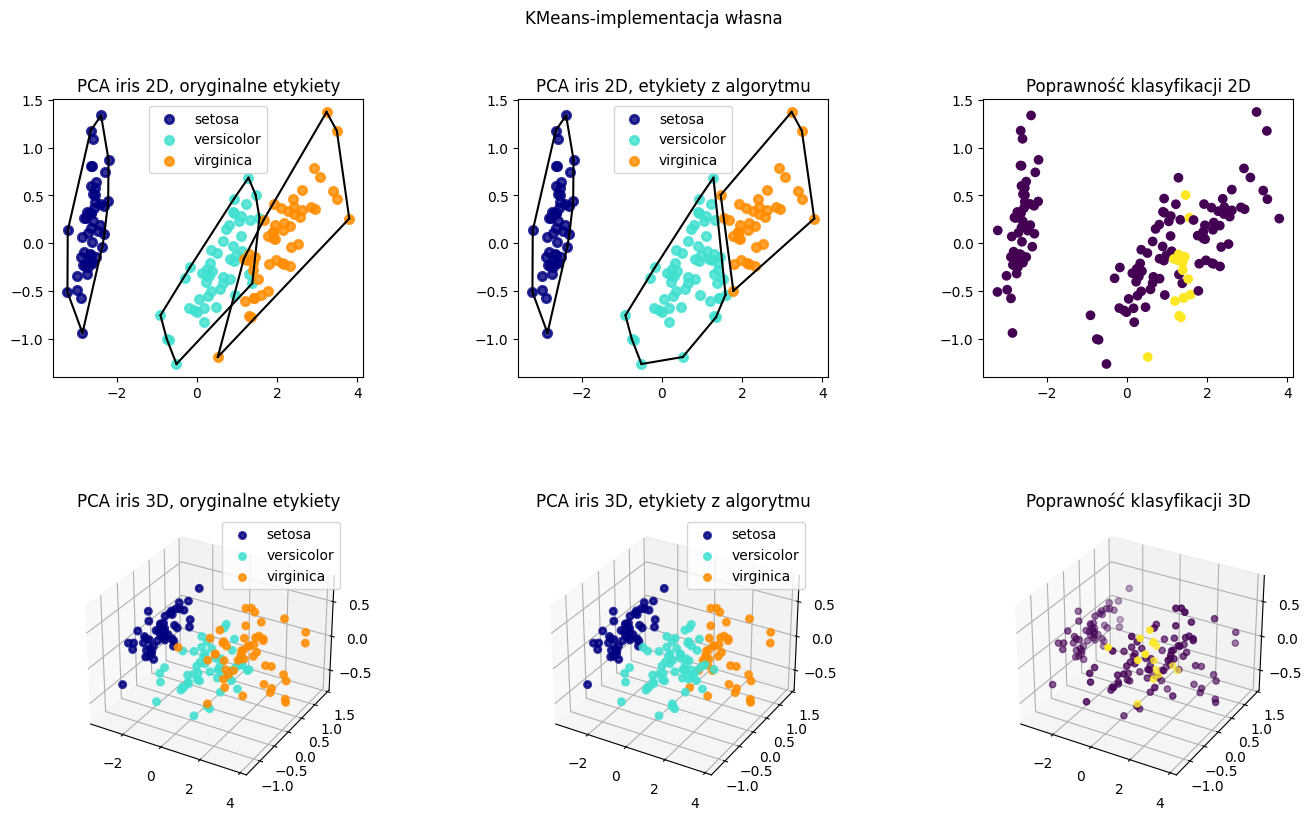

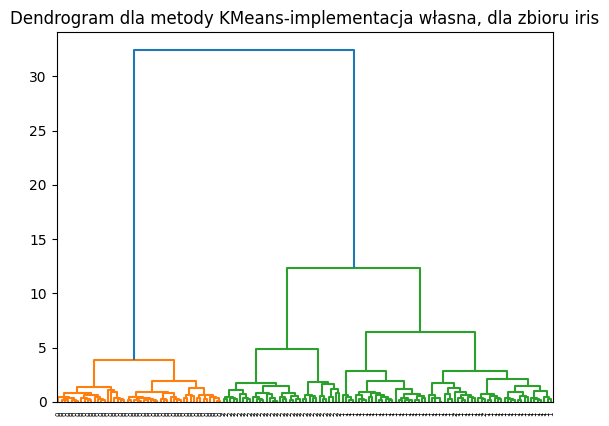

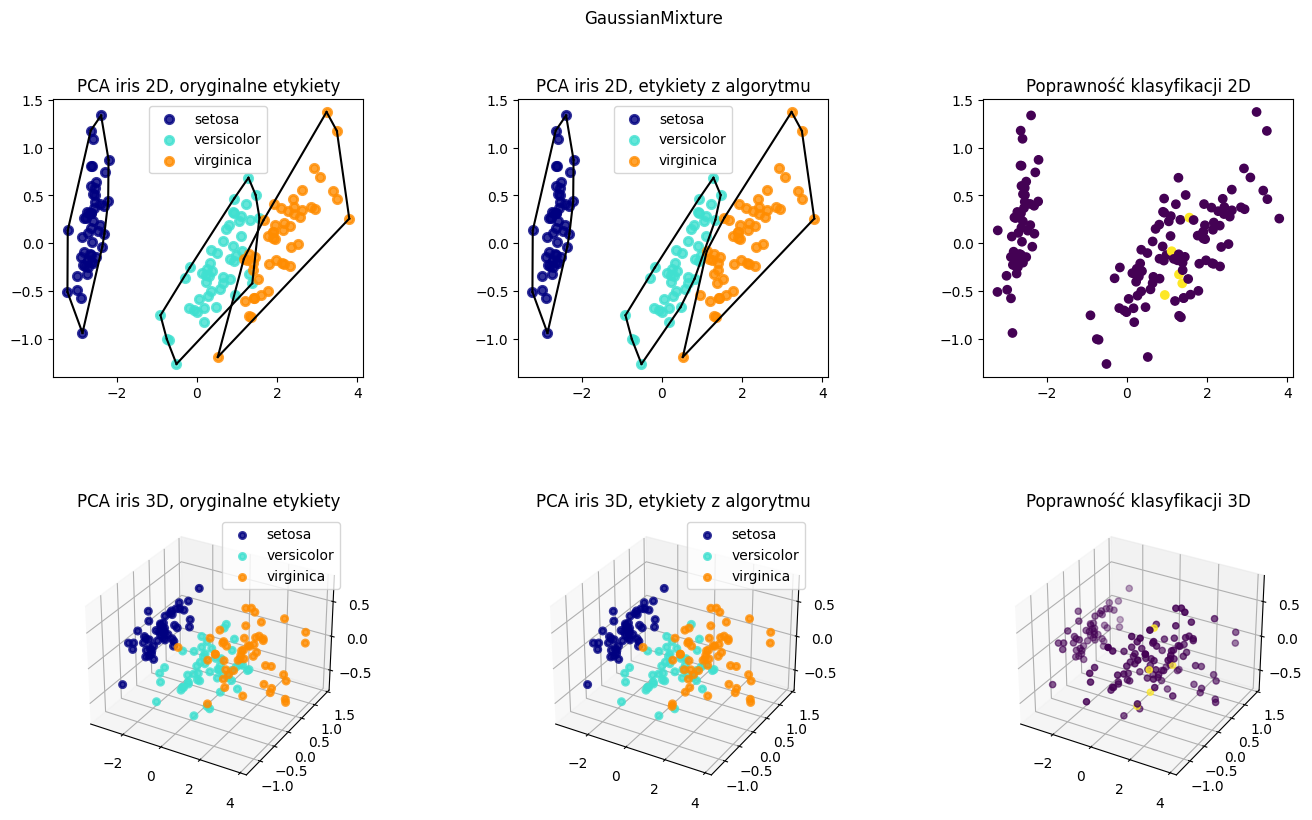

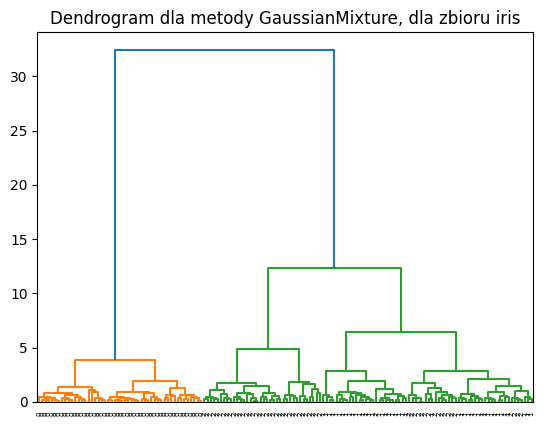

In [2]:
####################### IRIS

iris = datasets.load_iris()
X = iris.data
Y = iris.target
#coś unique, coś suma zad 2
#ward
print(Y)
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
#print(clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=3, linkage="complete").fit(X)
#print(clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=3, linkage="average").fit(X)
#print(clustering.labels_)

clustering = AgglomerativeClustering(n_clusters=3, linkage="single").fit(X)
#print(clustering.labels_)

#zaczynają od n klastrów dla n próbek i po kolei łączą je w większe klastry,
#kryterium łączenia zależy od linkage, łączą je aż do uzyskania n_clusters

def find_perm(clusters, Y_real, Y_pred):
    perm = []
    for i in clusters:
        idx = Y_pred == i #maskowanie
        new_label = np.array([scipy.stats.mode(Y_real[idx])])[0, 0]
        perm.append(new_label)

    return np.array([perm[label] for label in Y_pred])

def funkcja2D3D(X, Y, result, metoda_klasteryzacji, zbior_danych, colors, groups, labels, isHull=False):
    fig = plt.figure(figsize=(16, 9))
    gs = gridspec.GridSpec(2, 3, wspace=0.5, hspace=0.5)
    fig.suptitle(metoda_klasteryzacji)

    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)

    ############################### wykres oryginalnych etykiet irysów
    ax1 = plt.subplot(gs[0, 0])
    #colors = ["navy", "turquoise", "darkorange"]
    lw = 2
    #[0,1,2] iris.target_names
    for color, i, target_name in zip(colors, groups, labels):
        ax1.scatter(X_reduced[Y == i, 0], X_reduced[Y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
        if isHull and np.count_nonzero(X_reduced[Y == i]) > 2:
          hull = ConvexHull(X_reduced[Y == i])
          for simplex in hull.simplices:
              ax1.plot(X_reduced[Y == i][simplex, 0], X_reduced[Y == i][simplex, 1], 'k-')


    ax1.legend(loc="best", shadow=False, scatterpoints=1)
    ax1.set_title(f'PCA {zbior_danych} 2D, oryginalne etykiety')

    ############################### wykres klas decyzyjnych z algorytmu
    ax2 = plt.subplot(gs[0, 1])
    for color, i, target_name in zip(colors, groups, labels):
        ax2.scatter(X_reduced[result == i, 0], X_reduced[result == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
        if isHull and np.count_nonzero(X_reduced[result == i]) > 2:
          hull = ConvexHull(X_reduced[result == i])
          for simplex in hull.simplices:
              ax2.plot(X_reduced[result == i][simplex, 0], X_reduced[result == i][simplex, 1], 'k-')

    ax2.legend(loc="best", shadow=False, scatterpoints=1)
    ax2.set_title(f'PCA {zbior_danych} 2D, etykiety z algorytmu')

    ############################## wykres różnic
    ax3 = plt.subplot(gs[0, 2])
    ax3.scatter(X_reduced[:, 0], X_reduced[:, 1], c = (Y != result))
    ax3.set_title("Poprawność klasyfikacji 2D")

    ############################# 3D

    pca = PCA(n_components=3)
    X_reduced = pca.fit_transform(X)


    ########################### wykres oryginalnych etykiet irysów
    ax4 = plt.subplot(gs[1, 0], projection='3d')

    for color, i, target_name in zip(colors, groups, labels):
        ax4.scatter(X_reduced[Y == i, 0], X_reduced[Y == i, 1], X_reduced[Y == i, 2], color=color, alpha=0.8, lw=lw, label=target_name)

    ax4.legend(loc="best", shadow=False, scatterpoints=1)
    ax4.set_title(f'PCA {zbior_danych} 3D, oryginalne etykiety')
    ########################## wykres klas decyzyjnych z algorytmu
    ax5 = plt.subplot(gs[1, 1], projection='3d')

    for color, i, target_name in zip(colors, groups, labels):
        ax5.scatter(X_reduced[result == i, 0], X_reduced[result == i, 1], X_reduced[result == i, 2], color=color, alpha=0.8, lw=lw, label=target_name)

    ax5.legend(loc="best", shadow=False, scatterpoints=1)
    ax5.set_title(f'PCA {zbior_danych} 3D, etykiety z algorytmu')
    ######################### wykres różnic

    ax6 = plt.subplot(gs[1, 2], projection='3d')
    ax6.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c = (Y != result))
    ax6.set_title("Poprawność klasyfikacji 3D")
    plt.savefig(zbior_danych + metoda_klasteryzacji + "2D-3D")
    plt.show()

def funkcja_dendrogram(X, Y, metoda_klasteryzacji, zbior_danych):
  Z = linkage(X, method='ward')
  dendrogram(Z, labels=Y)
  plt.title(f'Dendrogram dla metody {metoda_klasteryzacji}, dla zbioru {zbior_danych}')
  plt.savefig(zbior_danych + metoda_klasteryzacji + "Dendrogram")
  plt.show()

###########################AGLOMERACJA
clustering = AgglomerativeClustering(n_clusters=3, linkage="ward").fit(X)
Y_pred = clustering.labels_
clusters = np.unique(Y_pred)
print(Y_pred)

result = find_perm(clusters, Y, Y_pred)
print(result)

j_score = jaccard_score(Y, result, average=None)
print(j_score)
#[1.         0.75384615 0.68627451]
j_score = jaccard_score(Y, np.sort(result), average=None)
print(j_score)
#[1.      0.78125 0.72   ]

#j_score to miara podobieństwa między dwoma zestawami etykiet

funkcja2D3D(X, Y, result, "Aglomeracja", "iris", ["navy", "turquoise", "darkorange"], [0, 1, 2], iris.target_names, True)
funkcja_dendrogram(X, result, "Aglomeracja", "iris")

###################KMEANS
clustering = KMeans(n_clusters=3).fit(X)
Y_pred = clustering.labels_
clusters = np.unique(Y_pred)
result = find_perm(clusters, Y, Y_pred)
funkcja2D3D(X, Y, result, "KMeans", "iris", ["navy", "turquoise", "darkorange"], [0, 1, 2], iris.target_names, True)
funkcja_dendrogram(X, result, "KMeans", "iris")

###################KMEANS WŁASNORĘCZNE
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
#features = ['sepal length (cm)', 'sepal width (cm)']
#data = df_iris[features].copy()

clustering, P, C, iterations = k_means(data, 3)
P = P.reshape(-1).astype(int)
P = P - 1
clusters = np.unique(P)
result = find_perm(clusters, Y, P)

funkcja2D3D(X, Y, result, "KMeans-implementacja własna", "iris", ["navy", "turquoise", "darkorange"], [0, 1, 2], iris.target_names, True)
funkcja_dendrogram(X, result, "KMeans-implementacja własna", "iris")

###################GAUSSIAN
clustering = GaussianMixture(n_components=3, random_state=3).fit(X)
Y_pred = clustering.predict(X)
clusters = np.unique(Y_pred)
result = find_perm(clusters, Y, Y_pred)
funkcja2D3D(X, Y, result, "GaussianMixture", "iris", ["navy", "turquoise", "darkorange"], [0, 1, 2], iris.target_names, True)
funkcja_dendrogram(X, result, "GaussianMixture", "iris")
#kwantyzacja coś reshape(-1,3) -> powrót reshape(w,k,3)

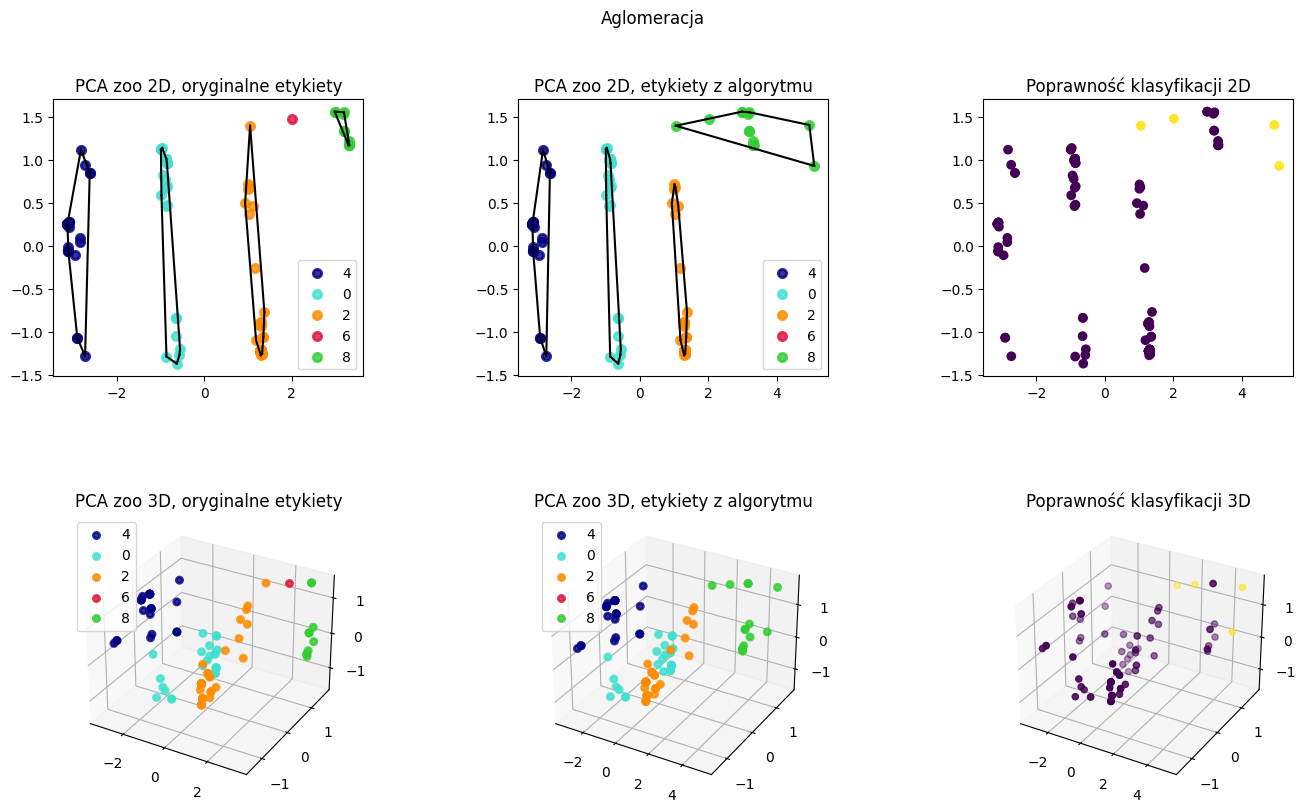

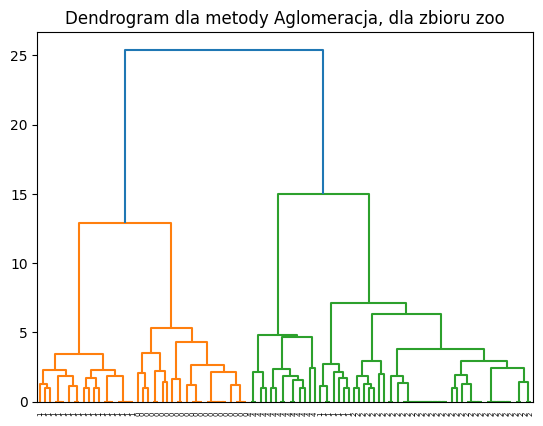

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


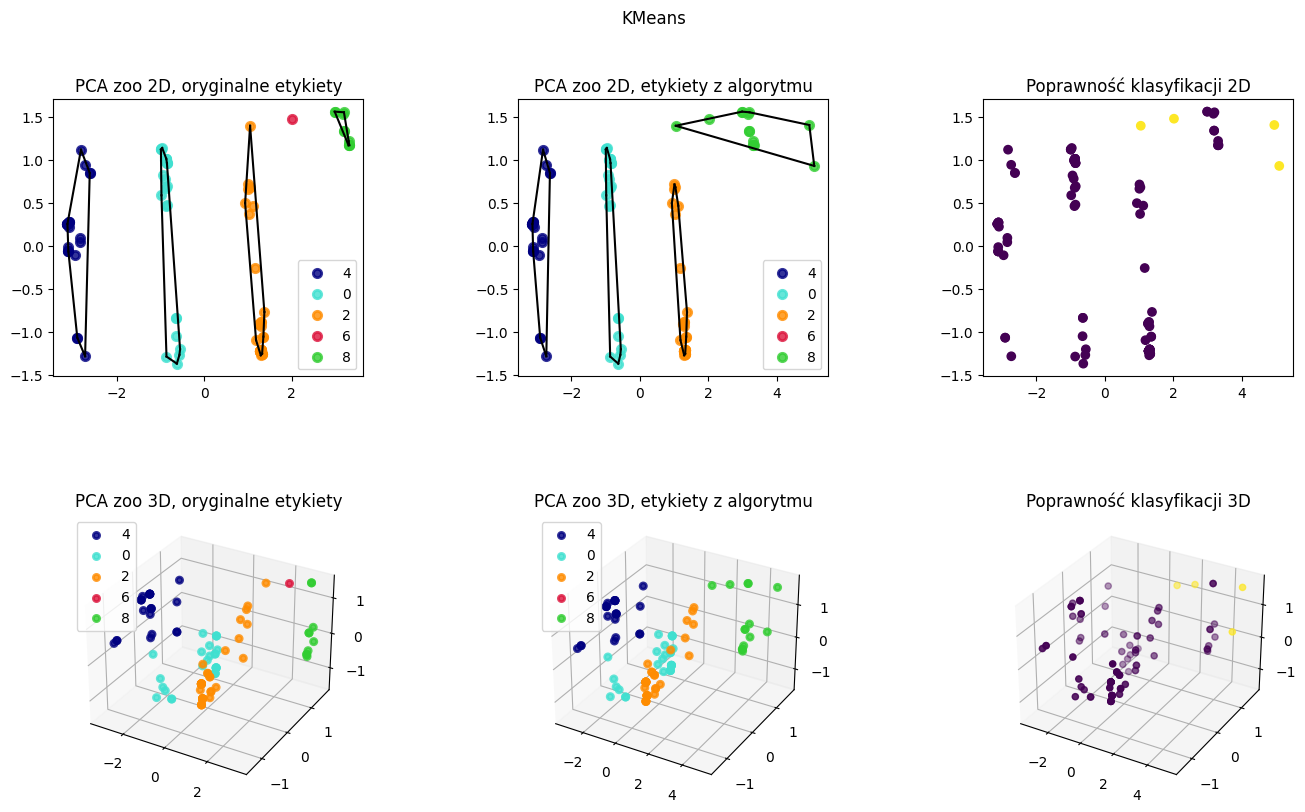

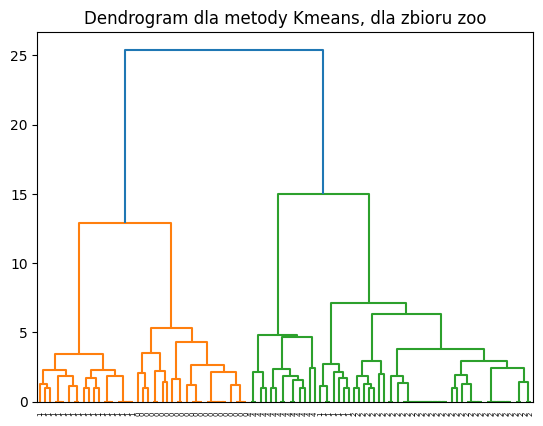

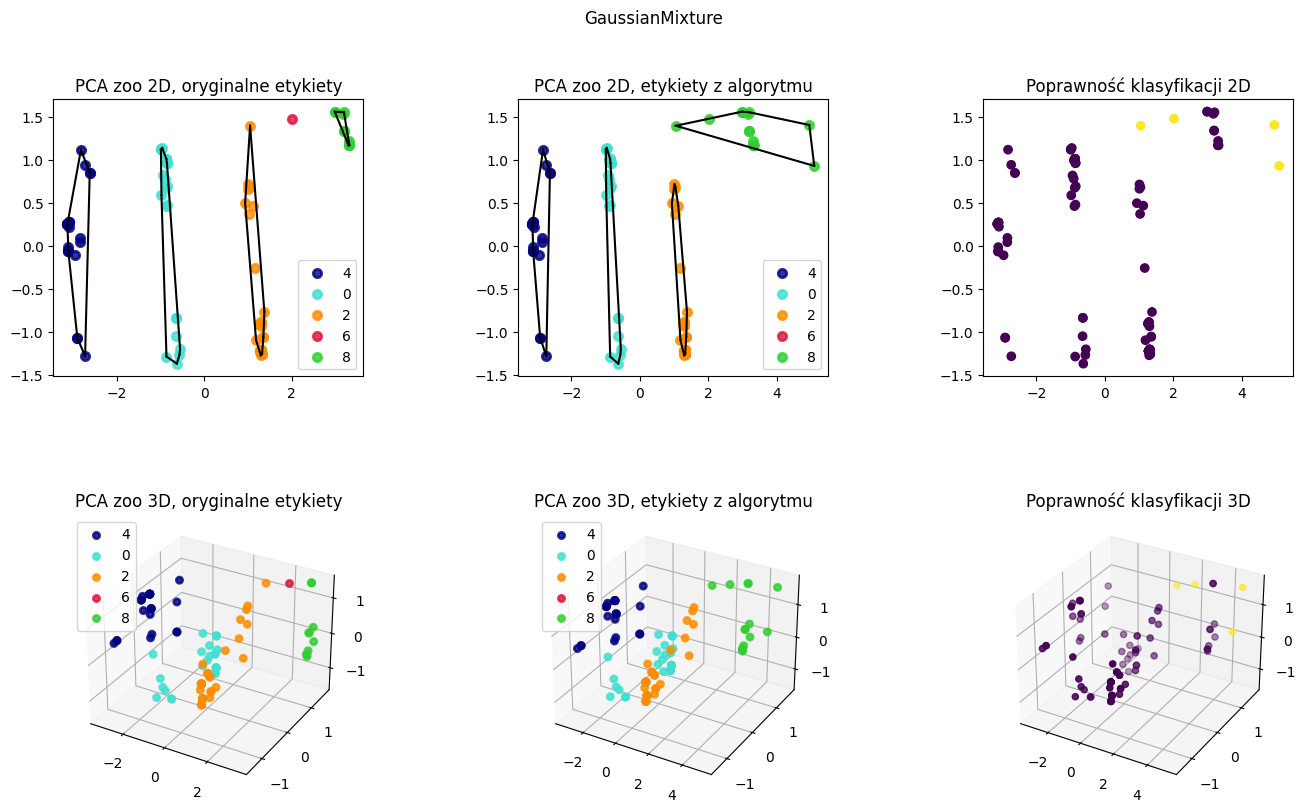

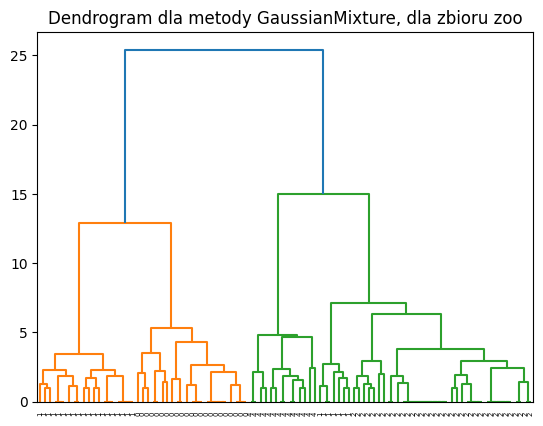

In [7]:
###Zbiór danych zoo

df = pd.read_csv('/zoo.csv')
Y = LabelEncoder().fit_transform(df['legs']) # ig etykiety to może być liczba nóg
features = df.columns[1:-1]
data = df[features].copy()

#########Aglomeracja

clustering = AgglomerativeClustering(n_clusters=5, linkage="ward")
Y_pred = clustering.fit_predict(data)
clusters = np.unique(Y_pred)
result = find_perm(clusters, Y, Y_pred)
funkcja2D3D(data, Y, result, "Aglomeracja", "zoo", ["navy", "turquoise", "darkorange", "crimson", "limegreen"], [0, 1, 2, 3, 4], df['legs'].unique(), True)
funkcja_dendrogram(data, result, "Aglomeracja", "zoo")

######Kmeans

clustering = KMeans(n_clusters=5, random_state=42)
Y_pred = clustering.fit_predict(data)
clusters = np.unique(Y_pred)
result = find_perm(clusters, Y, Y_pred)
funkcja2D3D(data, Y, result, "KMeans", "zoo", ["navy", "turquoise", "darkorange", "crimson", "limegreen"], [0, 1, 2, 3, 4], df['legs'].unique(), True)
funkcja_dendrogram(data, result, "Kmeans", "zoo")

#######Kmeans - moje (coś nie działa)
'''clustering, P, C, iterations = k_means(data, 5)
P = P.reshape(-1).astype(int)
P = P - 1
clusters = np.unique(P)
result = find_perm(clusters, Y, P)

funkcja2D3D(data, Y, result, "KMeans-implementacja własna", "zoo", ["navy", "turquoise", "darkorange", "crimson", "limegreen"], [0, 1, 2, 3, 4], df['legs'].unique(), True)
funkcja_dendrogram(data, result, "KMeans-implementacja własna", "zoo")'''

#########GaussianMixture

clustering = GaussianMixture(n_components=5, random_state=3).fit(data)
Y_pred = clustering.predict(data)
clusters = np.unique(Y_pred)
result = find_perm(clusters, Y, Y_pred)
funkcja2D3D(data, Y, result, "GaussianMixture", "zoo", ["navy", "turquoise", "darkorange", "crimson", "limegreen"], [0, 1, 2, 3, 4], df['legs'].unique(), True)
funkcja_dendrogram(data, result, "GaussianMixture", "zoo")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


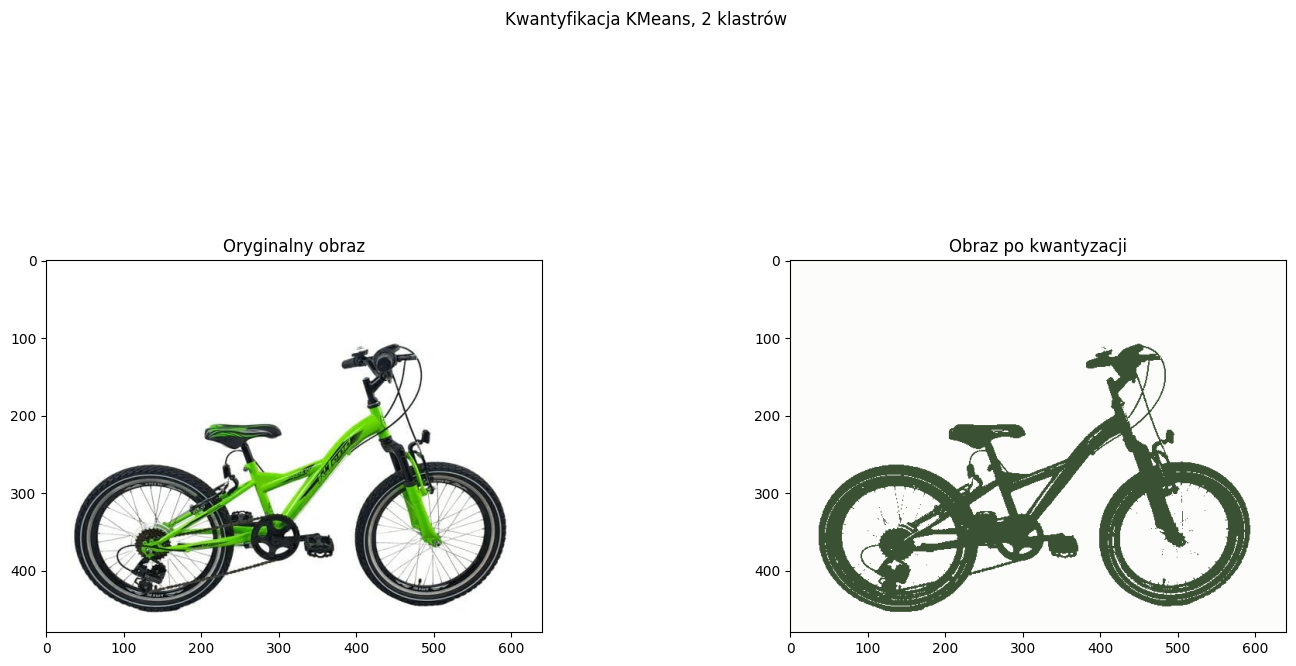

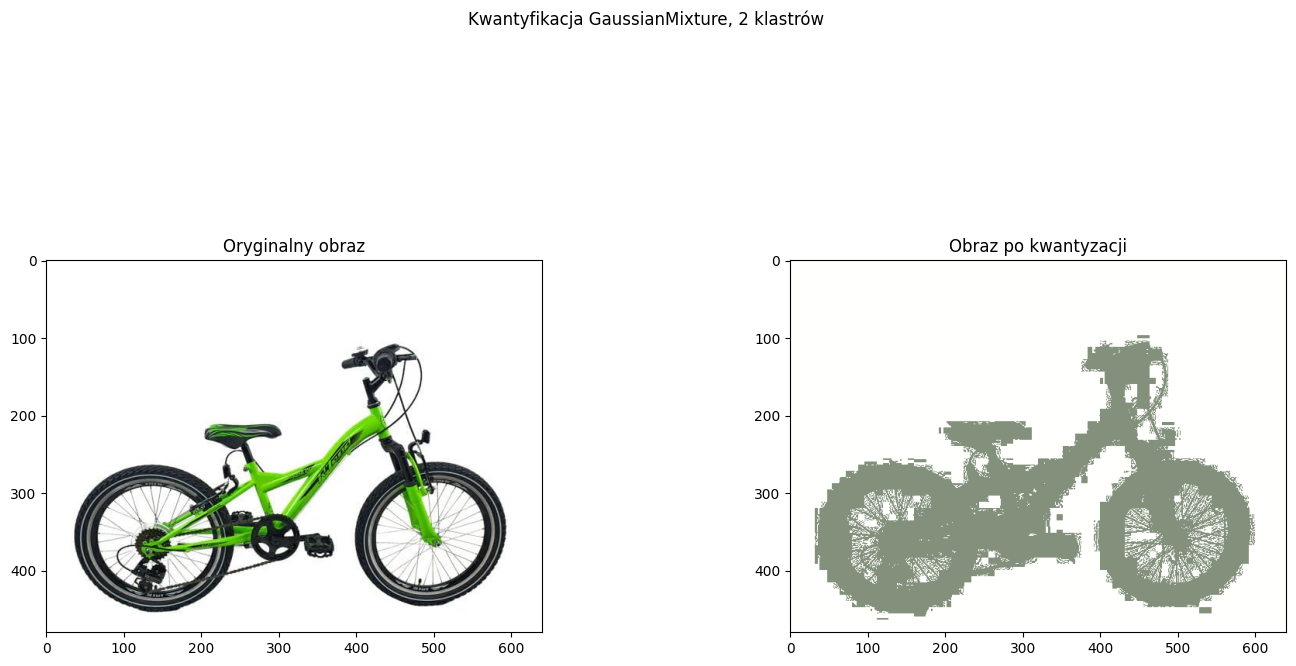

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


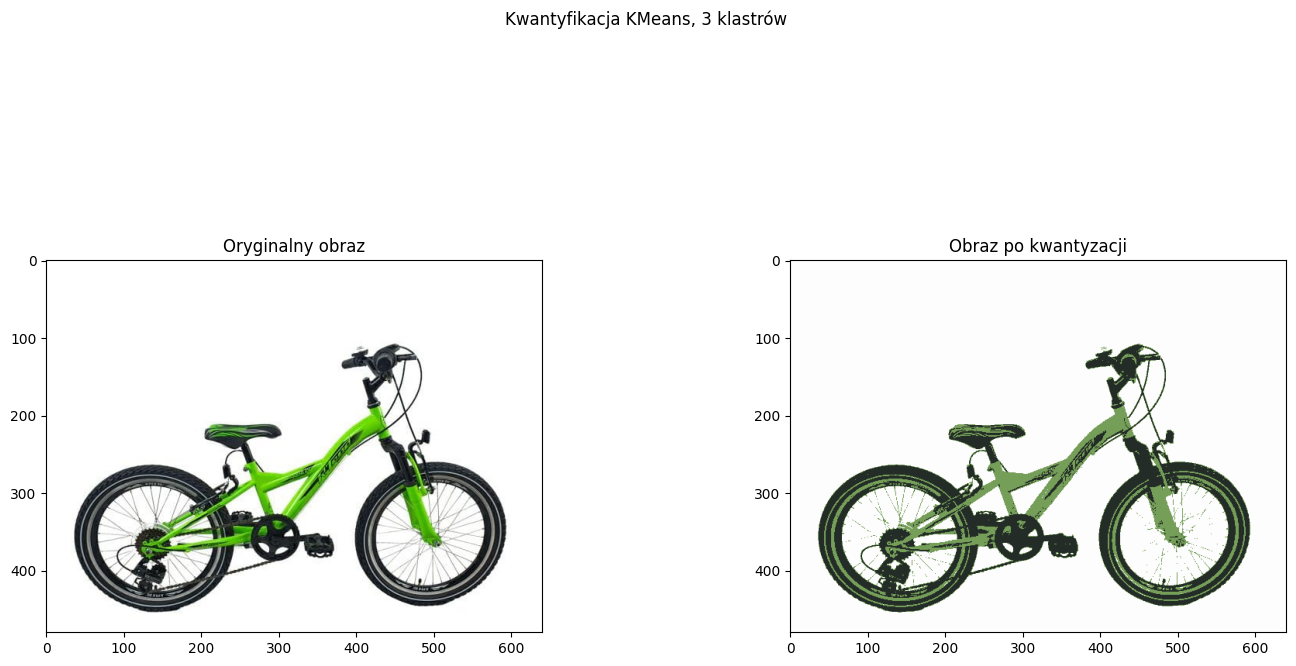

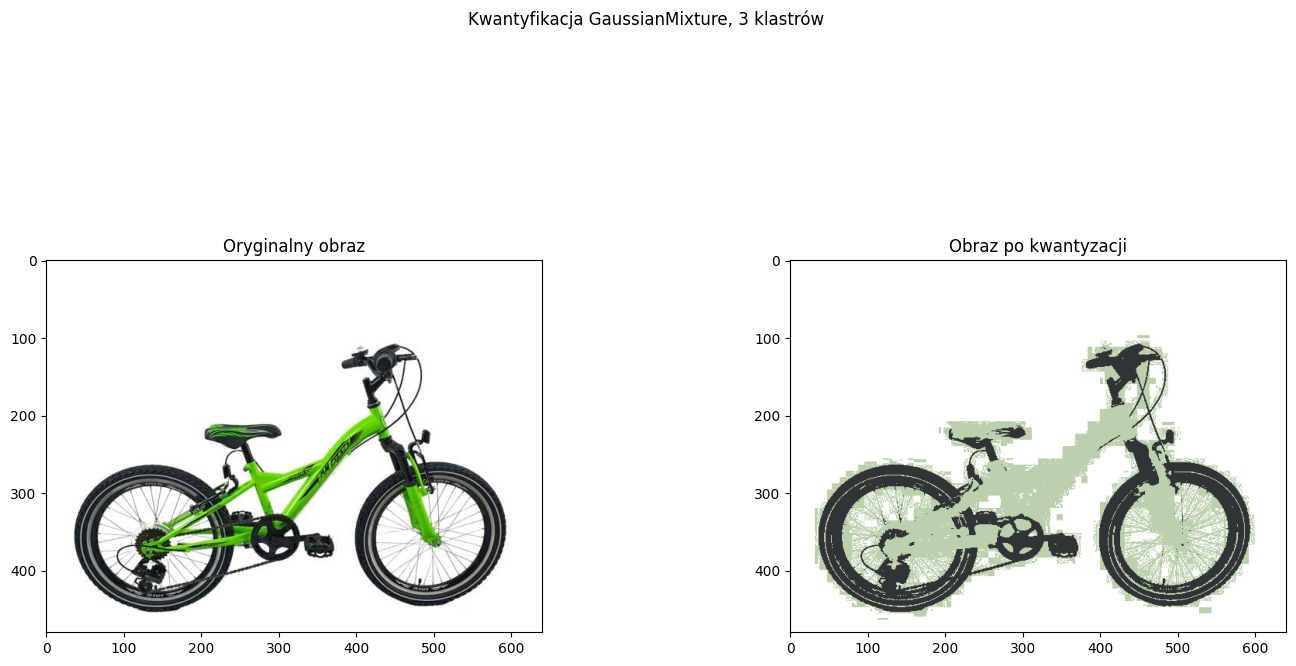

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


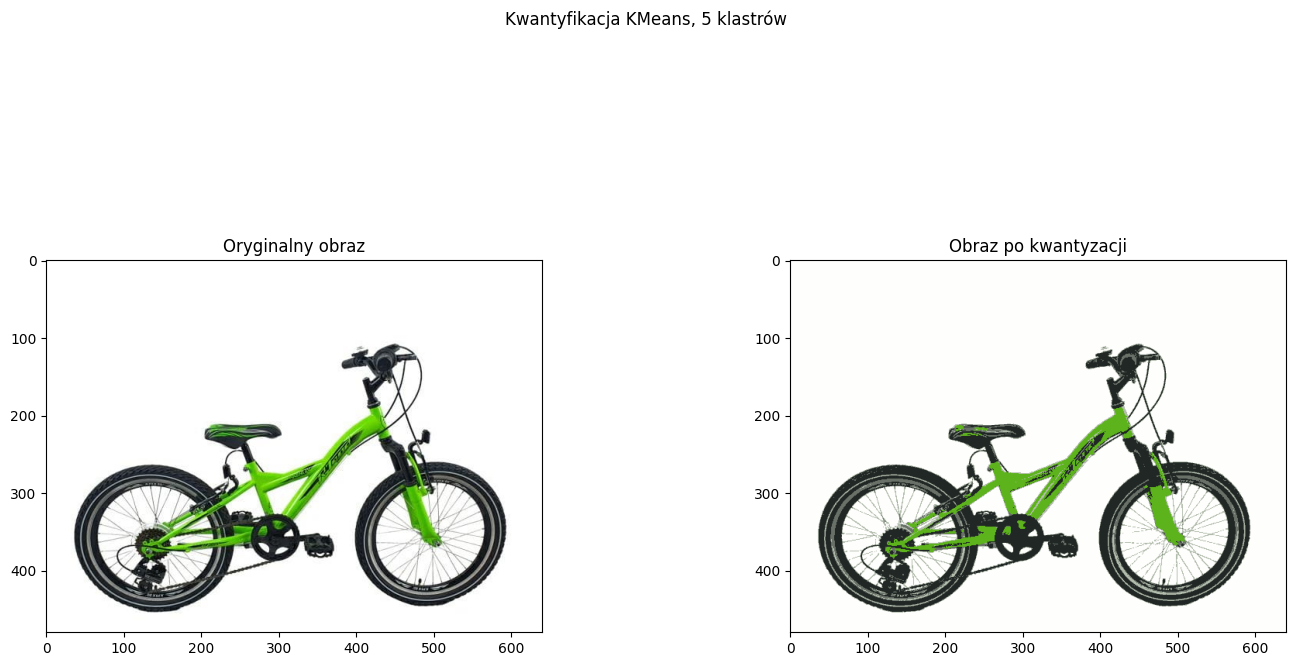

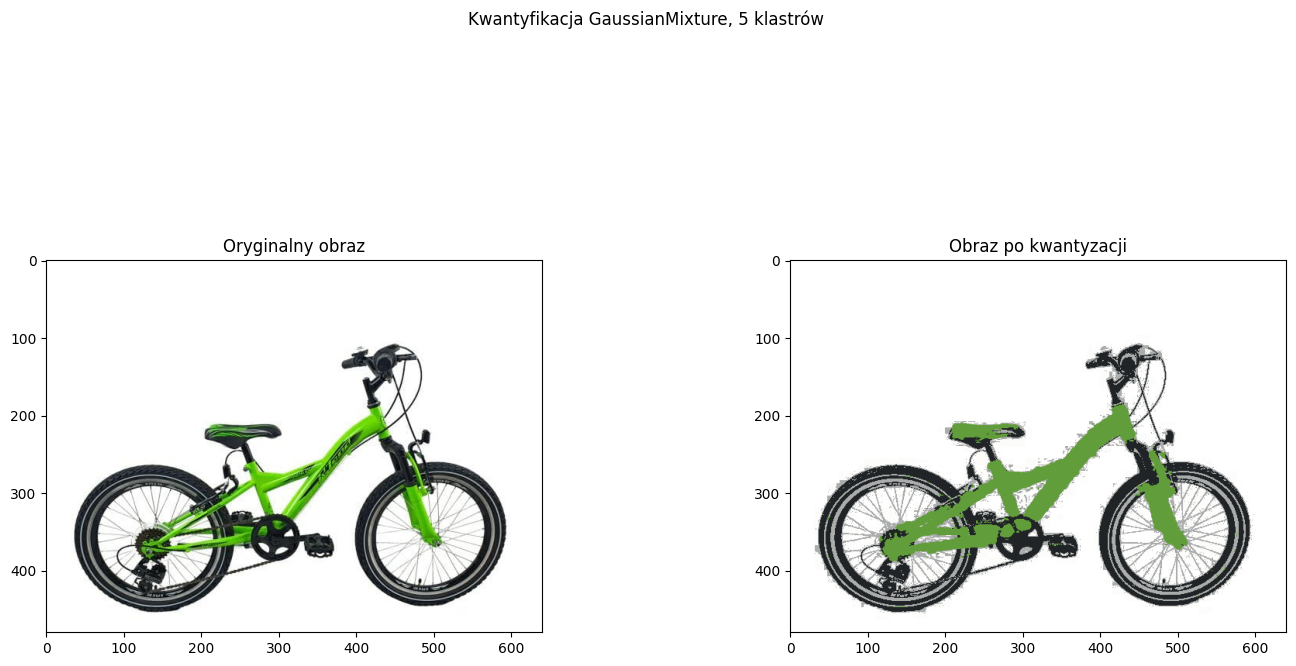

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


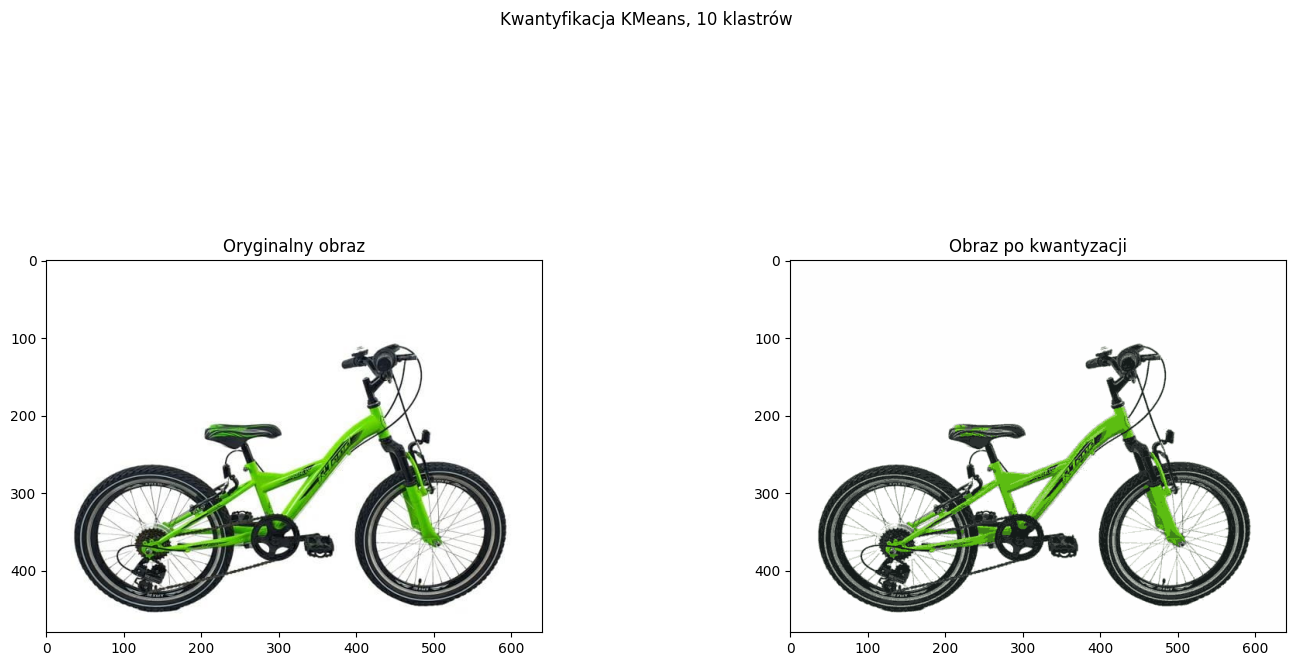

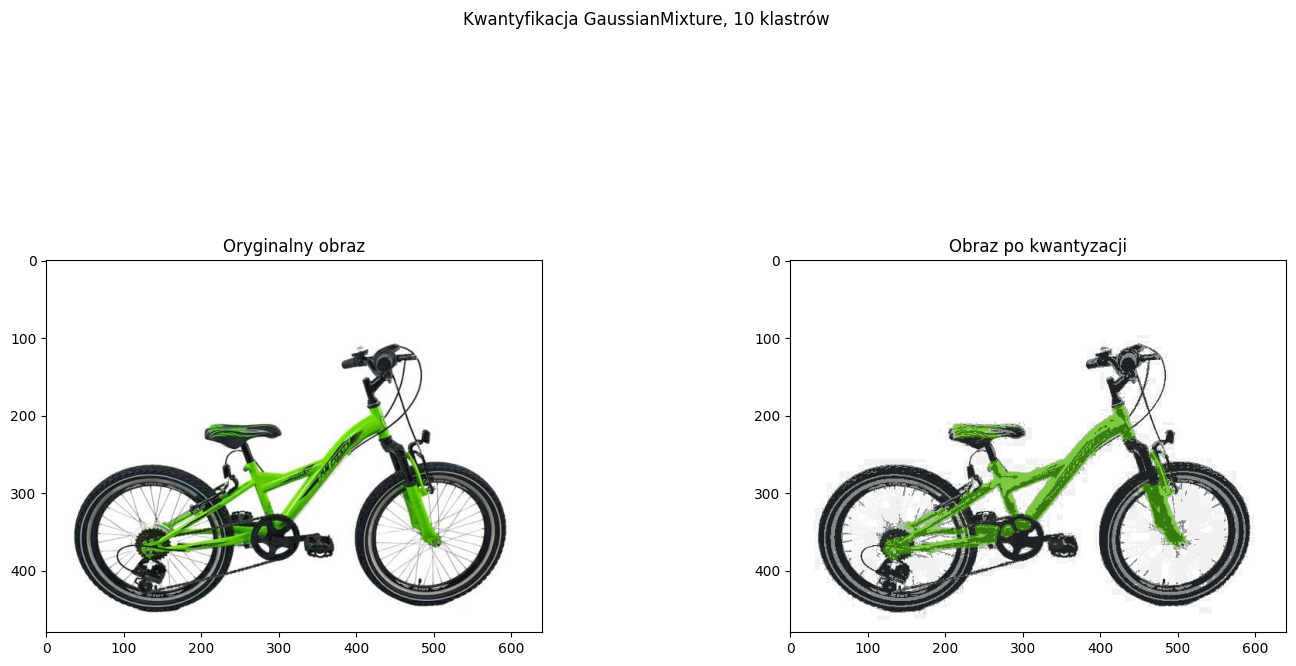

KMEANS Błędy średniokwadratowe, liczba klastrów - błąd [(2, 32.48836480034722), (3, 25.044002821180555), (5, 22.19407009548611), (10, 18.311826171875)]
GaussianMixture Błędy średniokwadratowe, liczba klastrów - błąd [(2, 28.026930338541668), (3, 31.60259223090278), (5, 22.655224609375), (10, 27.86918728298611)]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return self.fit(X, sample_weight=sample_weight).labels_


ValueError: cannot reshape array of size 1440 into shape (480,640,3)

In [ ]:
import matplotlib.image as mpimg


img = mpimg.imread('/rowertaki.jpg')
og_img = np.copy(img)

#new img = np.reshape(img, (640*480,3))[perm,:]
# no i potem powrót to jest reshape(640, 480,3)

#perm = np.random.permutation(pixels.shape[0])
#permuted_pixels = pixels[perm]
def funkcja(klastry):
  mse_kmeans = []
  mse_gm = []

  for number in klastry:
##sekcja kmeans
    dane = np.copy(og_img)
    dane = dane.reshape(-1,3)
    kmeans = KMeans(n_clusters=number, random_state=42)
    Y_pred = kmeans.fit_predict(dane)
    centers = kmeans.cluster_centers_

    for idx, label in enumerate(Y_pred):
      dane[idx,:] = centers[label, :]
    fig = plt.figure(figsize=(16, 9))
    fig.suptitle(f'Kwantyfikacja KMeans, {number} klastrów')
    gs = gridspec.GridSpec(1, 2, wspace=0.5, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])
    ax1.set_title("Oryginalny obraz")
    ax1.imshow(img)

    dane = dane.reshape(480,640,3)
    ax2 = plt.subplot(gs[0, 1])
    ax2.set_title("Obraz po kwantyzacji")
    ax2.imshow(dane)
    plt.savefig(f'Kwantyzacja dla {number} klastrów, metoda KMeans')
    plt.show()

    mse = np.mean((og_img - dane) ** 2)
    mse_kmeans.append((number, mse))
##sekcja gmm
    dane = np.copy(og_img)
    dane = dane.reshape(-1,3)
    gm = GaussianMixture(n_components=number, random_state=3)
    Y_pred = gm.fit_predict(dane)
    centers = np.array([dane[Y_pred == i].mean(axis=0) for i in range(number)])

    for idx, label in enumerate(Y_pred):
      dane[idx,:] = centers[label, :]
    fig = plt.figure(figsize=(16, 9))
    fig.suptitle(f'Kwantyfikacja GaussianMixture, {number} klastrów')
    gs = gridspec.GridSpec(1, 2, wspace=0.5, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])
    ax1.set_title("Oryginalny obraz")
    ax1.imshow(img)

    dane = dane.reshape(480,640,3)
    ax2 = plt.subplot(gs[0, 1])
    ax2.set_title("Obraz po kwantyzacji")
    ax2.imshow(dane)
    plt.savefig(f'Kwantyzacja dla {number} klastrów, metoda GaussianMixture')
    plt.show()

    mse = np.mean((og_img - dane) ** 2)
    mse_gm.append((number, mse))
  return mse_kmeans, mse_gm

a, b = funkcja([2, 3, 5, 10])
print("KMEANS Błędy średniokwadratowe, liczba klastrów - błąd", a)
print("GaussianMixture Błędy średniokwadratowe, liczba klastrów - błąd", b)

def funkcja_permutacje(klastry):
  mse_kmeans = []
  mse_gm = []

  for number in klastry:
##sekcja kmeans
    dane = np.copy(og_img)
    perm = np.random.permutation(dane.shape[0])
    dane = np.reshape(dane, (640*480,3))[perm,:]

    dane = dane.reshape(-1,3)
    kmeans = KMeans(n_clusters=number, random_state=42)
    Y_pred = kmeans.fit_predict(dane)
    centers = kmeans.cluster_centers_

    for idx, label in enumerate(Y_pred):
      dane[idx,:] = centers[label, :]

    og_dane = np.copy(dane)
    og_dane[perm, :] = dane
    og_dane = np.reshape(og_dane, (480,640,3))

    fig = plt.figure(figsize=(16, 9))

    fig.suptitle(f'Kwantyfikacja permutacje KMeans, {number} klastrów')
    gs = gridspec.GridSpec(1, 2, wspace=0.5, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])
    ax1.set_title("Oryginalny obraz")
    ax1.imshow(og_img)

    #dane = dane.reshape(480,640,3)
    ax2 = plt.subplot(gs[0, 1])
    ax2.set_title("Obraz po kwantyzacji z permutacją")
    ax2.imshow(og_dane)
    plt.savefig(f'Kwantyzacja permutacje dla {number} klastrów, metoda KMeans')
    plt.show()

    mse = np.mean((og_img - dane) ** 2)
    mse_kmeans.append((number, mse))
##sekcja gmm
    dane = np.copy(og_img)
    perm = np.random.permutation(dane.shape[0])
    dane = np.reshape(dane, (640*480,3))[perm,:]

    dane = dane.reshape(-1,3)
    gm = GaussianMixture(n_components=number, random_state=3)
    Y_pred = gm.fit_predict(dane)
    centers = np.array([dane[Y_pred == i].mean(axis=0) for i in range(number)])

    for idx, label in enumerate(Y_pred):
      dane[idx,:] = centers[label, :]

    og_dane = np.copy(dane)
    og_dane[perm, :] = dane
    og_dane = np.reshape(og_dane, (480,640,3))

    fig = plt.figure(figsize=(16, 9))

    fig.suptitle(f'Kwantyfikacja permutacje GM, {number} klastrów')
    gs = gridspec.GridSpec(1, 2, wspace=0.5, hspace=0.5)
    ax1 = plt.subplot(gs[0, 0])
    ax1.set_title("Oryginalny obraz")
    ax1.imshow(og_img)

    #dane = dane.reshape(480,640,3)
    ax2 = plt.subplot(gs[0, 1])
    ax2.set_title("Obraz po kwantyzacji z permutacją")
    ax2.imshow(og_dane)
    plt.savefig(f'Kwantyzacja permutacje dla {number} klastrów, metoda GM')
    plt.show()

    mse = np.mean((og_img - dane) ** 2)
    mse_gm.append((number, mse))
  return mse_kmeans, mse_gm

c, d = funkcja_permutacje([2, 3, 5, 10])